# Title: AIDI 1002 Final Term Project Report

Rushda Shaahani Najeeb -200526636@student.gerogianc.on.ca

Pranavi Satheesan- 200536120@student.georgianc.on.ca

# Introduction:

The Heart Attack Analysis & Prediction Dataset is a collection of medical and health-related data that provides insights into various factors that may contribute to the occurrence of a heart attack. The dataset includes information on several patient attributes, such as age, sex, and blood pressure, as well as various other health indicators, such as cholesterol levels, glucose levels, and smoking habits.

This dataset is intended to be used for predicting the likelihood of a heart attack occurring in a given patient based on their health indicators and medical history. It contains 13 features and 303 instances, making it a relatively small dataset that is suitable for experimentation with various machine learning algorithms. The dataset is available on Kaggle and is widely used by researchers, data scientists, and machine learning enthusiasts to build predictive models for heart attack analysis and prediction.

#### Problem Description:

The Heart Attack Analysis & Prediction Dataset aims to address the problem of heart attacks, which is a leading cause of death worldwide. The dataset provides insights into various factors that may contribute to the occurrence of a heart attack, such as age, sex, blood pressure, cholesterol levels, glucose levels, and smoking habits.

The problem that this dataset aims to solve is to predict the likelihood of a heart attack occurring in a given patient based on their health indicators and medical history. This prediction can help healthcare professionals identify patients who are at high risk of having a heart attack and take preventative measures to reduce the risk.

Furthermore, the dataset can be used to identify the most important risk factors for heart attacks, which can be helpful in developing targeted prevention strategies. Overall, the Heart Attack Analysis & Prediction Dataset is a valuable resource for researchers and healthcare professionals working to prevent heart attacks and improve patient outcomes.


#### Context of the Problem:

The problem of predicting the likelihood of a heart attack is important because heart disease is one of the leading causes of death worldwide. According to the World Health Organization, an estimated 17.9 million people died from cardiovascular diseases in 2016, accounting for 31% of all global deaths.

Early identification of patients who are at high risk of having a heart attack can lead to early intervention and preventative measures that can save lives. By using the Heart Attack Analysis & Prediction Dataset to develop predictive models, healthcare professionals can identify patients who are at high risk of having a heart attack and take appropriate actions, such as prescribing medication, making lifestyle changes, or referring the patient to a specialist.

Moreover, understanding the risk factors for heart attacks can help healthcare professionals develop targeted prevention strategies to reduce the incidence of heart disease. By analyzing the data in the Heart Attack Analysis & Prediction Dataset, researchers can identify the most important risk factors for heart attacks and develop strategies to address them.


#### Limitation About TPOT:

Computationally expensive: TPOT can be computationally expensive, especially when searching for complex pipelines. The tool may require a lot of time and resources to run, which can be a limitation for users with limited computational resources.

Limited interpretability: While TPOT can generate accurate and optimized models, it can be difficult to interpret the pipeline generated by TPOT. This is because the pipeline may include several machine learning models, which may make it difficult to understand the relationships between the different models and features.

Limited customization: TPOT automates the entire process of model selection, feature engineering, and hyperparameter optimization. This means that users may have limited control over the specific choices made by TPOT. Users looking for more control over the machine learning process may prefer a more manual approach.

Data preprocessing: TPOT assumes that the input data has already been cleaned and preprocessed. If the input data is noisy or requires significant preprocessing, the performance of TPOT may be limited.

Limited to supervised learning: TPOT is designed for supervised learning tasks, and cannot be used for unsupervised learning tasks such as clustering or dimensionality reduction.

Overall, while TPOT is a powerful and effective tool, it is not a one-size-fits-all solution and may not be suitable for all machine learning tasks.

#### Limitations and strengths About Using other Approaches:

|Algorithm|Limitations|Strengths|
|---|---|---|
|Logistic Regression|Works best when the relationship between the dependent and independent variables is linear|Fast to train and interpret, can handle binary and multi-class classification|
|Decision Tree|Prone to overfitting, not suitable for complex datasets|Easy to understand and interpret, can handle both numerical and categorical data|
|Random Forest|Can be slow to train, not suitable for very large datasets|Reduces overfitting by combining multiple decision trees, can handle both numerical and categorical data|
|K-Nearest Neighbor|Sensitive to the choice of distance metric, requires a large amount of memory for large datasets|Simple to implement, can handle both numerical and categorical data|
|TPOT|May take a long time to run, may produce complex pipelines that are difficult to interpret|Automates the entire machine learning pipeline, including data preprocessing, feature selection, model selection, and hyperparameter tuning|

#### Solution:

How the method you are discussing is going to solve it today. Wrtie couple of sentences only.

# Background

Explain the related work using the following table

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Takci, H. (n.d.). [1] | The paper proposes a new method for the automatic detection of epileptic seizures from electroencephalogram (EEG) signals using a combination of wavelet transform, power spectral density, and linear discriminant analysis| Statlog (Heart) Dataset | Only includes EEG signals from a small number of patients (15) with a specific type of epilepsy (temporal lobe epilepsy)
| Manikandan, S. [2] | The paper proposes an algorithm for the automatic detection of diabetic retinopathy from retinal fundus images using a combination of morphological operations, feature extraction, and machine learning techniques | Heart Disease Dataset | Only includes images from a specific type of camera 


# Methodology

### Implementation with tpot

In [1]:
# install tpot
!pip install tpot

In [2]:
#import needed libraries
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=UserWarning)

%matplotlib inline

In [3]:
#read data
heart_data = pd.read_csv("heart.csv")
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#split data for training and test
features = heart_data.drop('output', axis='columns')
labels = heart_data['output']
X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    train_size=0.75, test_size=0.25, random_state=42)

In [5]:
#tpot implementation
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_pipeline.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8369082125603864

Generation 2 - Current best internal CV score: 0.8369082125603864

Generation 3 - Current best internal CV score: 0.8369082125603864

Generation 4 - Current best internal CV score: 0.8372946859903381

Generation 5 - Current best internal CV score: 0.8372946859903381

Best pipeline: RandomForestClassifier(GradientBoostingClassifier(input_matrix, learning_rate=1.0, max_depth=5, max_features=0.45, min_samples_leaf=20, min_samples_split=10, n_estimators=100, subsample=0.5), bootstrap=True, criterion=gini, max_features=0.8, min_samples_leaf=15, min_samples_split=18, n_estimators=100)
0.8026315789473685


In [6]:
#final exported pipline file
file = open('tpot_pipeline.py', 'r')
content = file.read()
print(content)
file.close()

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.8372946859903381
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=1.0, max_depth=5, max_features=0.45, min_samples_leaf=20, min_samples_split=10, n_estimators=100, subsample=0.5)),
    RandomForestClassifier(boot

# Citation

@article{le2020scaling,
  title={Scaling tree-based automated machine learning to biomedical big data with a feature set selector},
  author={Le, Trang T and Fu, Weixuan and Moore, Jason H},
  journal={Bioinformatics},
  volume={36},
  number={1},
  pages={250--256},
  year={2020},
  publisher={Oxford University Press}
}


# Implementation

In this section, you will provide the code and its explanation. You may have to create more cells after this. (To keep the Notebook clean, do not display debugging output or thousands of print statements from hundreds of epochs. Make sure it is readable for others by reviewing it yourself carefully.)

In [7]:
#Import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=UserWarning)

%matplotlib inline

In [8]:
# Load the dataset into a pandas DataFrame
heart = pd.read_csv("heart.csv")

In [9]:
#Check the missing values
print(heart.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [10]:
#Get details about the dataset
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

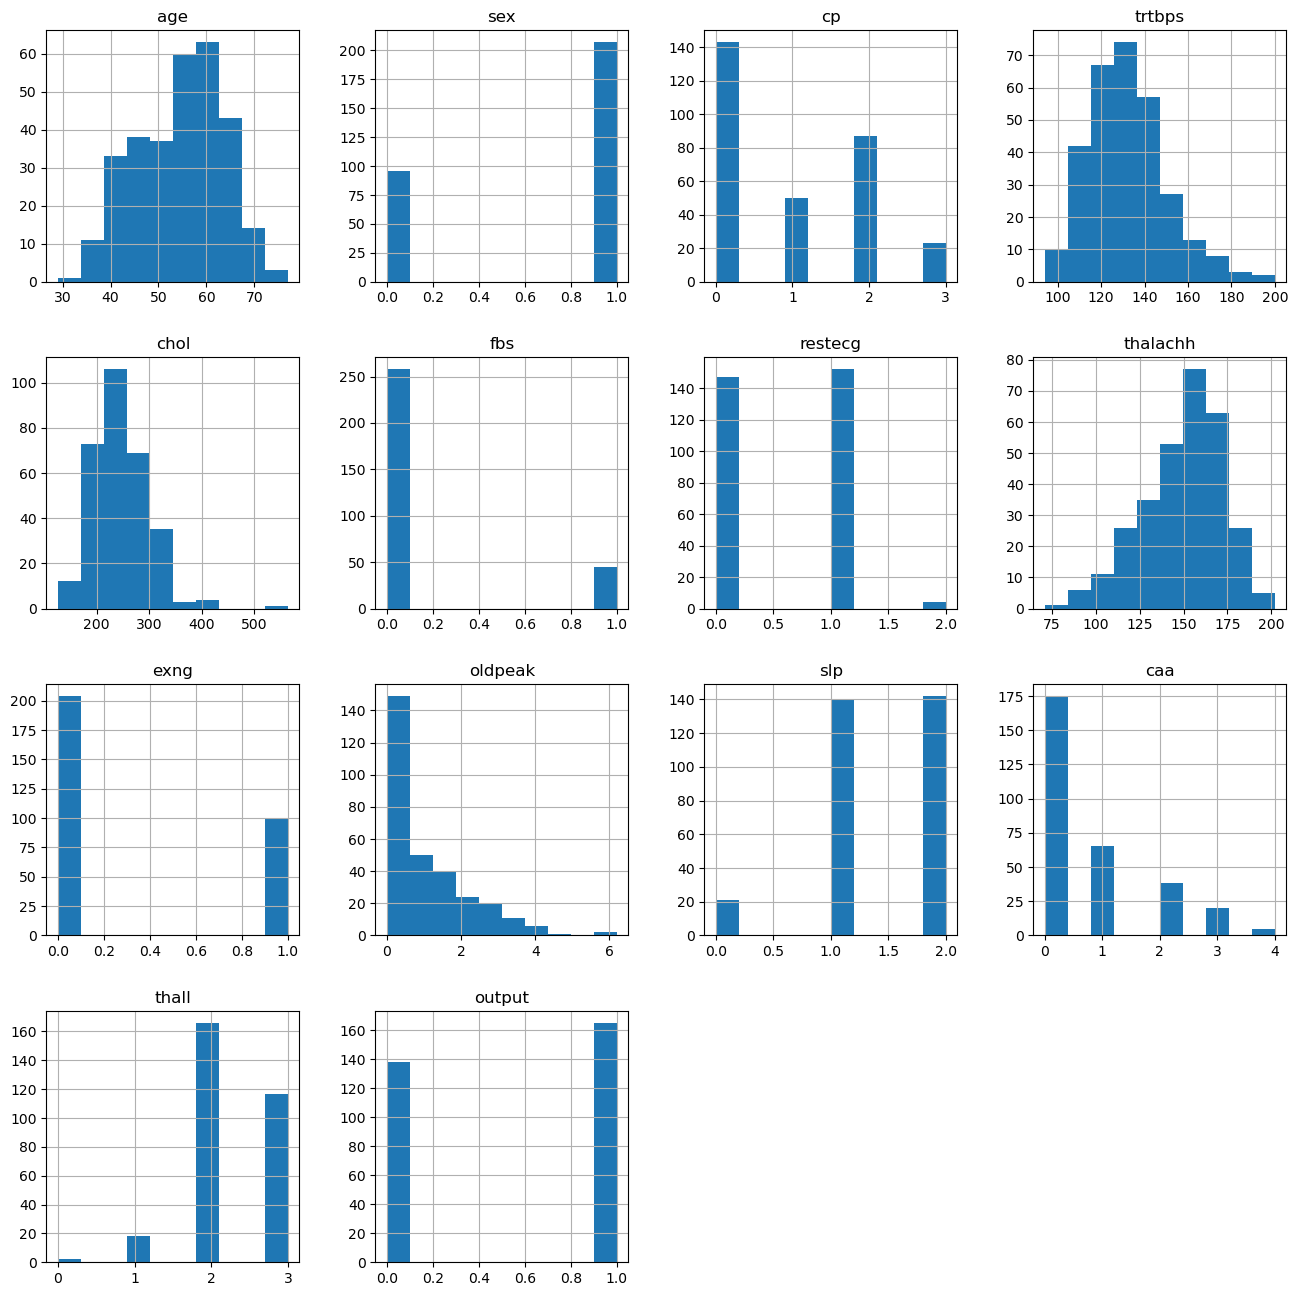

In [12]:
#Plot the histogram
heart.hist(figsize=(16,16))

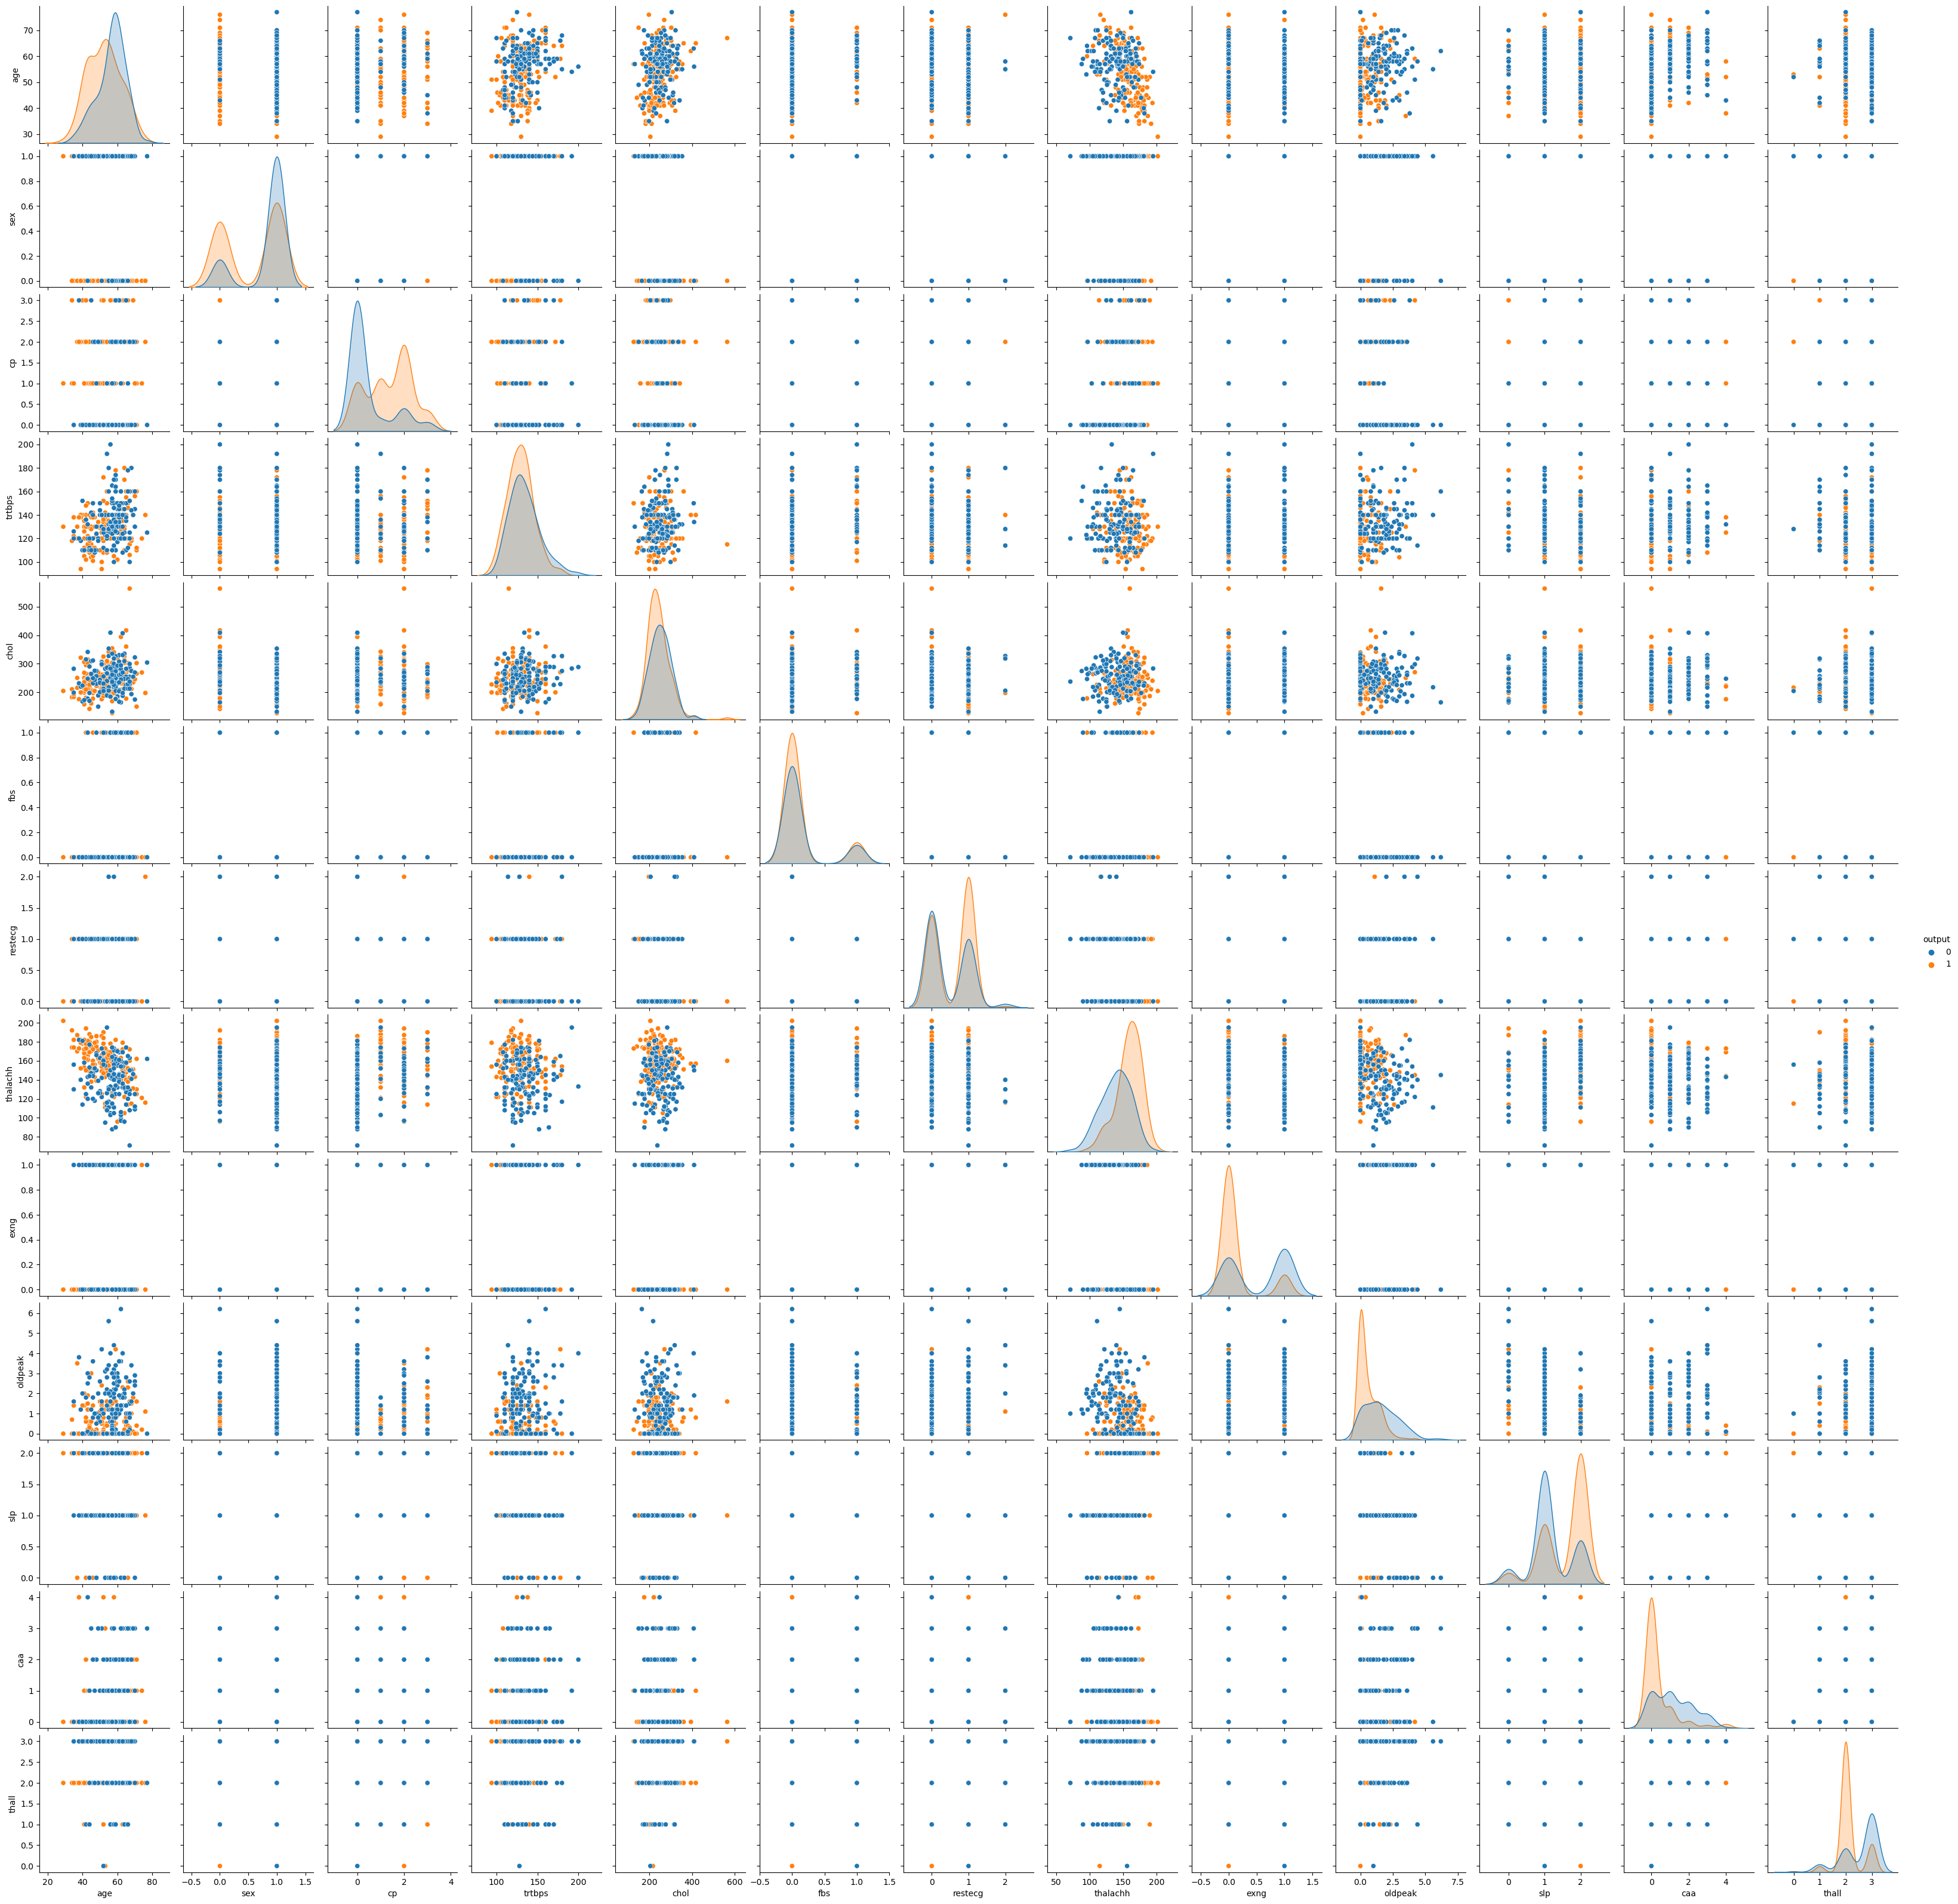

In [13]:
#Plot the pairplot
sns.pairplot(heart,hue='output')

<AxesSubplot:>

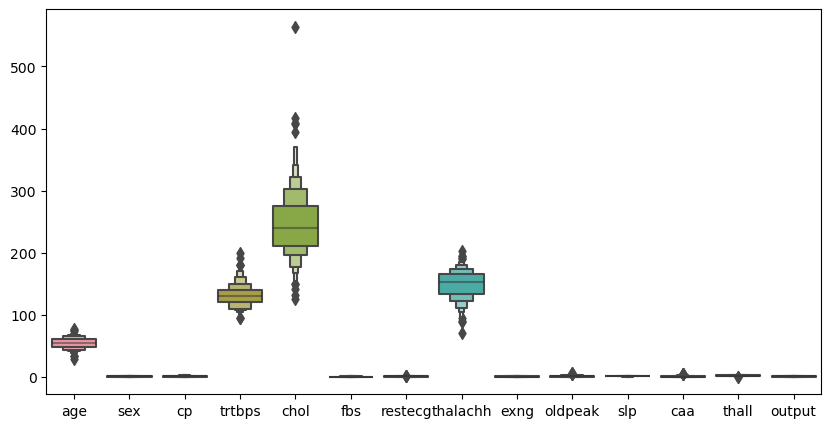

In [14]:
#Check for outliers
plt.figure(figsize=(10,5))
sns.boxenplot(data=heart)

In [15]:
#handling outliers

#calculating lower bound
Q1 = heart.quantile(0.25)

#calculating the upper bound
Q3 = heart.quantile(0.75)

IQR = Q3 - Q1

# print(IQR)

print('shape of data before cleaning outliers: ',heart.shape)

heart = heart[~((heart < (Q1 - 1.5 * IQR)) |(heart > (Q3 + 1.5 * IQR))).any(axis=1)]

print('shape of data after cleaning outliers: ',heart.shape)

shape of data before cleaning outliers:  (303, 14)
shape of data after cleaning outliers:  (228, 14)


In [16]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

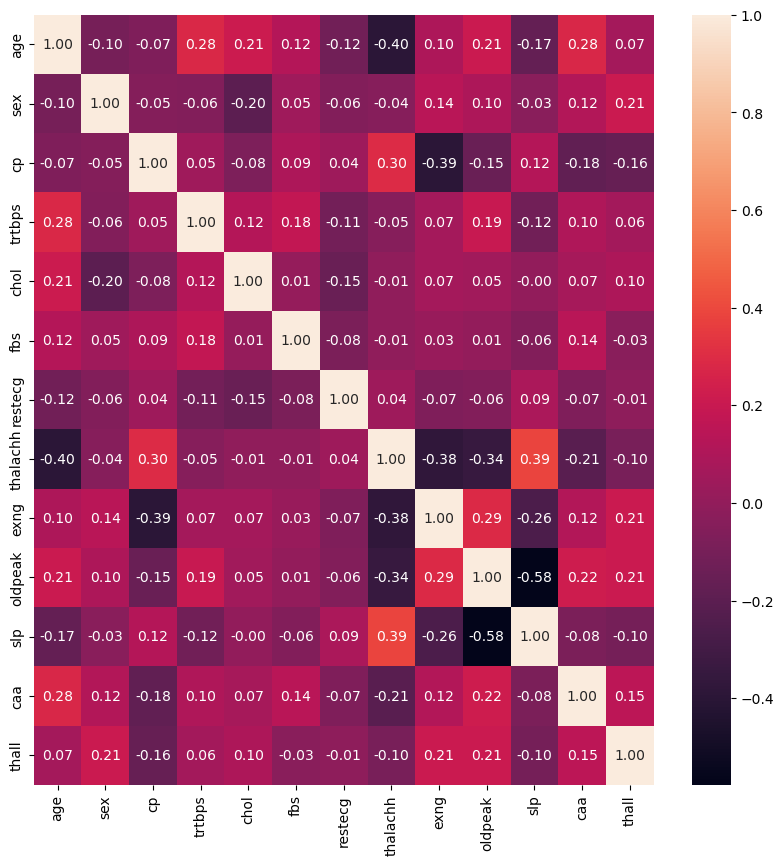

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(features.corr(), annot=True,fmt = '.2f')
plt.show()

In [18]:
#feature scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(heart)
scaled_features = pd.DataFrame(scaled_data,columns=heart.columns)
scaled_features

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,-1.133333,0.0,0.5,0.0,0.184874,0.0,0.0,1.040650,0.0,1.8125,-1.5,0.0,0.0,0.0
1,-0.866667,-1.0,0.0,0.0,-0.588235,0.0,-1.0,0.552846,0.0,0.5000,0.5,0.0,0.0,0.0
2,0.133333,0.0,0.0,-0.5,-0.050420,0.0,0.0,0.747967,0.0,0.1250,0.5,0.0,0.0,0.0
3,0.200000,-1.0,-0.5,-0.5,1.932773,0.0,0.0,0.260163,1.0,0.0000,0.5,0.0,0.0,0.0
4,0.200000,0.0,-0.5,0.5,-0.789916,0.0,0.0,-0.227642,0.0,-0.1250,-0.5,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.600000,-1.0,-0.5,-0.3,-0.705882,0.0,0.0,-0.617886,1.0,-0.3750,-0.5,0.0,0.0,-1.0
224,0.200000,-1.0,-0.5,0.5,0.033613,0.0,0.0,-1.040650,1.0,-0.2500,-0.5,0.0,1.0,-1.0
225,-0.600000,0.0,1.0,-1.0,0.420168,0.0,0.0,-0.747967,0.0,0.3750,-0.5,0.0,1.0,-1.0
226,0.200000,0.0,-0.5,0.0,-1.815126,0.0,0.0,-1.300813,1.0,0.3750,-0.5,1.0,1.0,-1.0


In [19]:
#preparing dataset
features = scaled_features.drop(columns = 'output', axis=1)
labels = scaled_features['output']

In [20]:
# Convert categorical features to dummy variables
heart = pd.get_dummies(heart, columns=["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"])

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features,labels, test_size=0.2, random_state=42)

In [22]:
#model evaluation
def evaluate_model(name, model, X_test, y_test,X_train, y_train):
    model.fit(X_train, y_train)
    start = time()
    pred = model.predict(X_test)
    end = time()
    accuracy = round(accuracy_score(y_test, pred), 3)
    precision = round(precision_score(y_test, pred,average='micro'), 3)
    recall = round(recall_score(y_test, pred,average='micro'), 3)
    latency = round((end - start)*1000, 1)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   latency))

In [23]:
#  Initializing and fitting models to find the accuracy results obtained in training

lr_model = LogisticRegression()
evaluate_model('LogisticRegression', lr_model, X_test, y_test, X_train, y_train)

dt_model = DecisionTreeClassifier()
evaluate_model('DecisionTreeClassifier', dt_model, X_test, y_test, X_train, y_train)

rf_model = RandomForestClassifier()
evaluate_model('RandomForestClassifier', rf_model, X_test, y_test, X_train, y_train)

knn_model = KNeighborsClassifier()
evaluate_model('KNeighborsClassifier', knn_model, X_test, y_test, X_train, y_train)

LogisticRegression -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
DecisionTreeClassifier -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.0ms
RandomForestClassifier -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 25.0ms
KNeighborsClassifier -- Accuracy: 0.891 / Precision: 0.891 / Recall: 0.891 / Latency: 7.0ms


# References

[1] Balaji, A. (2018, August 17). Benchmarking Automatic Machine Learning Frameworks. arXiv.org. https://arxiv.org/abs/1808.06492v1